<a href="https://colab.research.google.com/github/LuizTj/Backend-CRUD-Alunos/blob/main/01b_Representacao_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representação de Redes Neurais Artificiais

Neste capítulo, apresentaremos conceitos fundamentais sobre Redes Neurais Artificiais, como o _perceptron_, o _perceptron_ multicamadas e o algoritmo de _backpropagation_.

# _Perceptron_

O _Perceptron_ é uma representação matemática simplificada de neurônios, que foi publicada por Rosenblatt em 1958.
Este modelo aprende a realizar tarefas ao ajustar parâmetros internos de forma análoga a como conexões sinápticas são reforçadas por meio da aprendizagem Hebbiana, proposta em 1949.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/perceptron.jpg?raw=true" width="500"></center>

No caso, as entradas do _perceptron_ fazem o papel dos dentritos, recebendo sinais que são então multiplicado por pesos, similar às forças de conexões sinápticas, e soma todos os valores.
Quando este valor passa de um determinado limiar, o perceptron irá ativar sua saída de forma análoga a como o neurônio irá disparar um impulso elétrico por seu axônio.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/neuronio.jpg?raw=true" width="500"></center>

O _perceptron_ possui a forma matemática $\hat{y} = f(\mathbf{w}^T\mathbf{x} + b)$, onde $\mathbf{x}$ é um vetor de valores de entrada, que são multiplicados pelo vetor de pesos em $\mathbf{w}$ e somados com um valor de viés $b$, gerando um valor interno que é então passado à uma função de ativação $f(\cdot)$, que transforma no valor de saída $\hat{y}$.

## Código do _Perceptron_ em Python

Vejamos abaixo uma implementação do _perceptron_.

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

O processo de aprendizagem do _perceptron_ para uma determinada tarefa ocorre por meio de um processo iterativo supervisionado.
A partir de valores iniciais aleatórios (ou não) em $\mathbf{w}$ e $b$, o _perceptron_:

1. Realiza a previsão a partir da entrada de exemplo.

2. Comparada a saída com o valor esperado de saída.

 $$e_i = y_i - \hat{y}_i$$

3. Ajusta seus $n$ pesos $\mathbf{w}$ e viés $b$ são ajustados proporcionalmente em função da taxa de aprendizado $\eta$, dos erros de previsão e sinal de entrada.

 $$w_n = w_n + η \cdot e_i \cdot x_n$$

 $$b = b + η \cdot e_i$$

Este processo se repete por todos os exemplos múltiplas vezes até que seja atingido um critério de parada, como um erro suficientemente baixo ou ao final de uma determinada quantidade de repetições (ou épocas).

## Exemplo de Aplicação - Problema Linear

Vamos analisar o aprendizado do _perceptron_ em um exemplo linear.

Definimos um problema linear como aquele que pode ser separado por meio de uma única reta (ou hyperplano, quando falamos de dimensões maiores).

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

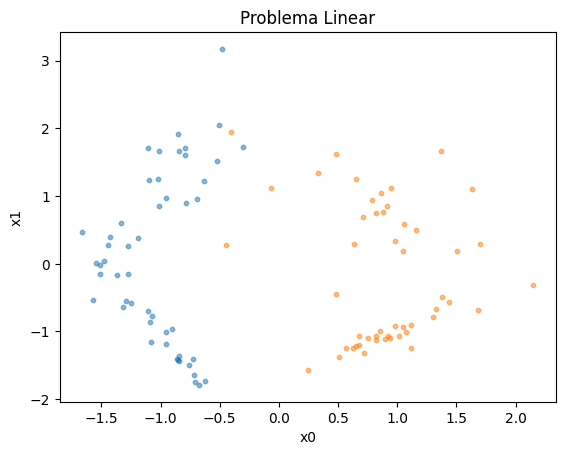

In [41]:
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, n_repeated=0,
    random_state=1
)

plt.scatter(X[y==0,0], X[y==0,1], s=10, alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], s=10, alpha=0.5)
plt.title('Problema Linear')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Criamos então o _perceptron_, cujo tamanho é definido como o número de variáveis do problema.

Em seguida, realizamos o treinamento por meio do método _fit_, que irá realizar o processo iterativo de ajuste dos pesos a partir do conjunto de dados.

Por fim, realizamos a previsão nos mesmos dados.

(Note que estamos utilizando os mesmos dados para treino e avaliação. O nome deste procedimento é resubstituição. Geralmente, preferimos avaliar o erro do modelo em um conjunto separado de dados, o que chamamos de validação cruzada.)

In [32]:
model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

Vejamos então a saída do modelo.
Percebe-se que a borda de decisão é uma reta, conforme já mencionado.

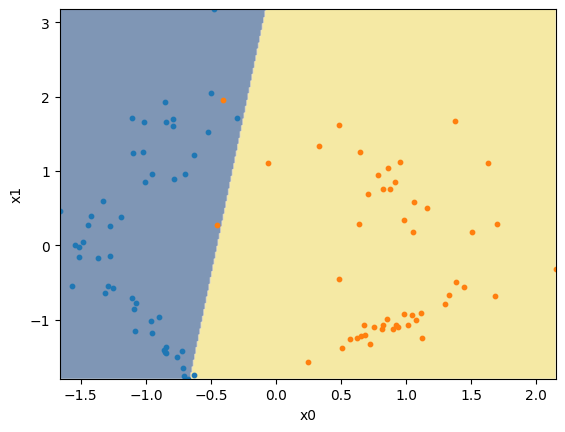

In [38]:
def plot_decision_boundary(model, X, y, axis=None):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if axis is None:
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        plt.scatter(X[y==0,0], X[y==0,1], s=10)
        plt.scatter(X[y==1,0], X[y==1,1], s=10)
        plt.xlim(X[:,0].min(), X[:,0].max())
        plt.ylim(X[:,1].min(), X[:,1].max())
        plt.xlabel('x0')
        plt.ylabel('x1')
    else:
        axis.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        axis.scatter(X[y==0,0], X[y==0,1], s=10)
        axis.scatter(X[y==1,0], X[y==1,1], s=10)
        axis.set_xlim(X[:,0].min(), X[:,0].max())
        axis.set_ylim(X[:,1].min(), X[:,1].max())
        axis.set_xlabel('x0')
        axis.set_ylabel('x1')

plot_decision_boundary(model, X, y)
plt.show()

## Limitação: Problemas Não-Lineares

Se aplicarmos o _perceptron_ em um problema não-linear, isto é, um problema cuja separação dos dados não segue uma linha reta, vemos que este modelo não consegue separar corretamente a maior parte dos exemplos.

In [7]:
from sklearn.datasets import make_moons

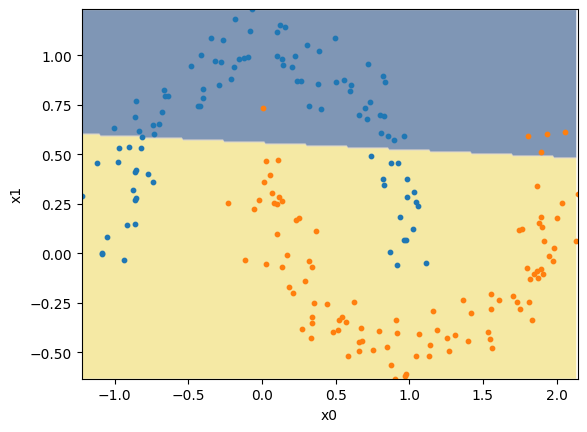

In [30]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y)
plt.show()

Portanto, vemos uma importante limitação dos _perceptrons_.
Eles não conseguem resolver problemas não-lineares.
Para resolver isto, precisamos de modelos mais complexos.
Um exemplo é o _perceptron_ multicamadas.

# Perceptron Multicamadas

O perceptron multicamadas é um modelo que possui um conjunto de perceptrons organizados em múltiplas camadas (conforme o nome).

Em sua forma mais simples, possuímos três camadas: a camada de entrada, a camada oculta, e a camada de saída.
A camada de entrada não possui _perceptrons_. Porém, é por ela que os sinais de entrada serão recebidos.
Na camada oculta, podemos ter diversos _perceptrons_ posicionados em paralelo.
Por fim, na camada de saída, temos um _perceptron_ (no caso de classificação binária).
<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/mlp.jpg?raw=true" width="600"></center>

É interessante observar que, enquanto os perceptrons da camada oculta recebem os sinais de entrada (multiplicados pelos pesos "sinápticos"), a camada de saída recebe os sinais emitidos pelos _perceptrons_ da camada oculta.
Isto é similar a como os dendritos (entradas) de um neurônio recebem sinais dos axônios (saídas) de outro neurônio, formando uma rede neural artificial.

Também é importante ressaltar que não estamos limitados a apenas três camadas. Podemos ter diversas camadas de perceptrons, cada uma recebendo sinais emitidos pela camada anterior e emitindo para a próxima camada.

Vejamos abaixo a implementação do perceptron multicamadas em Python.

In [18]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_output = np.zeros(1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self._sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self._sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y):
        # Calcula o erro e o gradiente na camada de saída
        output_error = y - self.final_output
        output_delta = output_error * self._sigmoid_derivative(self.final_output)
        # Calcula o erro e o gradiente na camada oculta
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self._sigmoid_derivative(self.hidden_output)
        # Ajusta os pesos e viés por meio de gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X)

Agora, realizamos o treino do Perceptron Multicamadas no problema não-linear.
Da mesma forma que com o _perceptron_, realizamos o treino no método _fit_ e a previsão no método _predict_.

Percebe-se que este novo modelo consegue criar uma borda de decisão não-linear, classificando corretamente a maior parte dos exemplos.

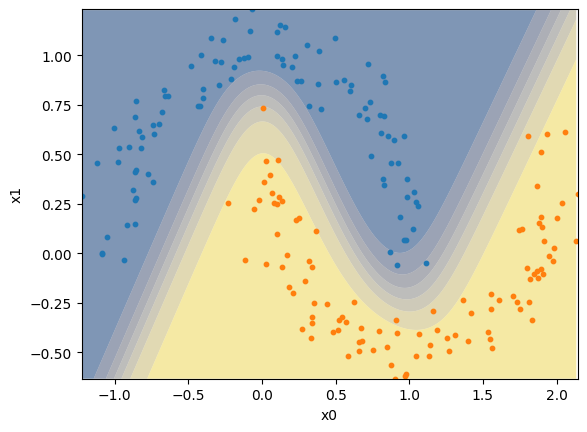

In [27]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = np.expand_dims(y, axis=1)

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=3, epochs=10_000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

## Desbravando do Multilayer Perceptron

Vamos entender, então, como o Perceptron Multicamadas consegue resolver o problema proposto. Começamos analisando cada neurônio, seguido pela nova função de ativação. Por fim, entenderemos o algoritmo de _bakcpropagation_.

### Camada Oculta

Para entender o que ocorre dentro deste modelo, vamos criar uma classe para facilitar o acesso à sua camada oculta.

In [11]:
class MLProbe():
    def __init__(self, model, probe_position=0):
        self.model = model
        self.probe_position = probe_position

    def predict(self, X):
        self.model.forward(X)
        return model.hidden_output[:,self.probe_position]

Assim, vamos analisar separadamente a saída de cada um dos três _perceptrons_ da camada oculta.

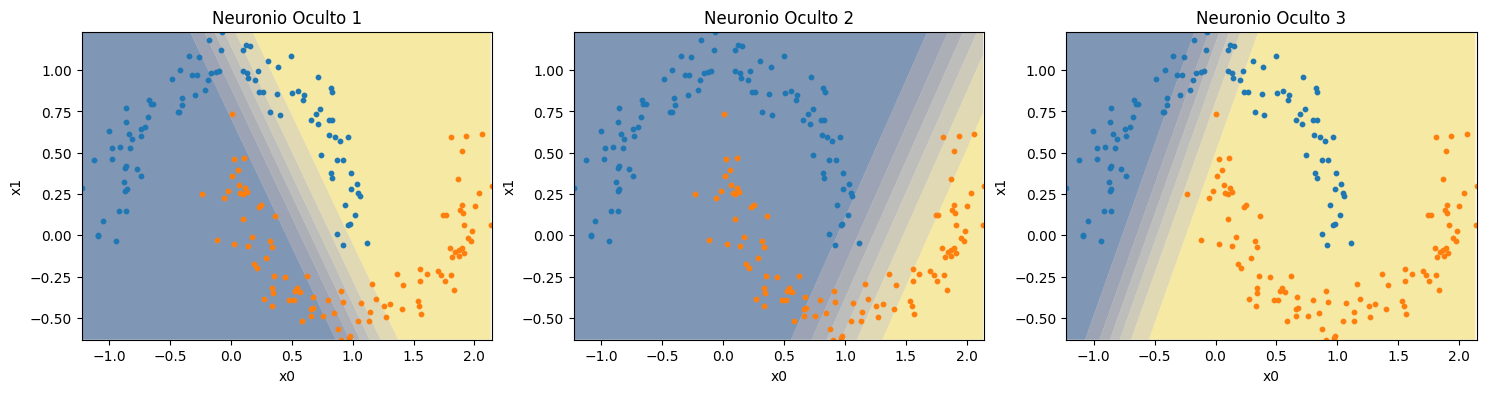

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))
for i in range(3):
    probed_model = MLProbe(model, i)
    axs[i].set_title(f'Neuronio Oculto {i+1}')
    plot_decision_boundary(probed_model, X, y[:,0], axis=axs[i])

Conseguimos verificar que cada _perceptron_ da camada oculta cria uma borda de classificação linear, cada uma em uma região diferente. Ao juntarmos estas bordas no _perceptron_ da camada de saída, temos a saída com borda não-linear.

### Função de Ativação

Um ponto interessante que verificamos nas saídas dos perceptrons multicamadas é que a borda de classificação apresenta um gradiente entre uma classe e outra. Isto ocorre porque, ao invés de utilizarmos a função de ativação do _perceptron_ original, utilizamos a função sigmóide, definida abaixo.

$$\delta(x) = \frac{1}{1+e^{-x}}$$

No gráfico a seguir conseguimos verificar o formato desta função, que parece um "S". Para valores muito baixos de $x$, o valor de saída da função é próximo a zero. Porém, a medida que $x$ se aproxima de 0, a saída começa a aumentar até chegar em 0.5. Após isto, enquanto o valor de $x$ aumenta, a saída da função aumenta até se aproximar do valor de 1.0.

De certa forma, esta função é parecida com a função de ativação do _perceptron_. Porém, esta função tem como característica ser contínua e derivável, o que permite o treinamento do perceptron multicamadas.

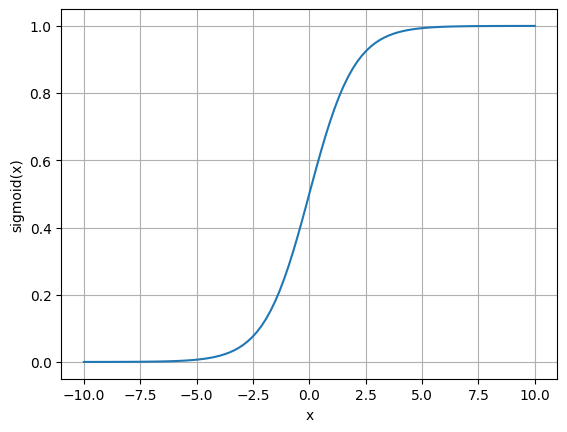

In [13]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

### Otimização

Por último, temos a otimização da rede neural. Isto é possível devido ao algoritmo de _bakpropagation_, criado em 1986, que foi um marco decisivo na área de inteligência artificial. Com as informações de gradientes, é possível otimizar os parâmetros da rede neural de forma a minimizar o erro do modelo.

Veremos estes conceitos no próximo capítulo.


# Exercícios

1. Execute a célula de treino do _perceptron_ algumas vezes e verifique os resultados. Depois, realize o mesmo com o treino do perceptron multicamadas. Houveram diferenças? Discuta quais são as diferenças e justifique.

from sklearn.datasets import make_moons


class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_output = np.zeros(1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self._sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self._sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y):
        # Calcula o erro e o gradiente na camada de saída
        output_error = y - self.final_output
        output_delta = output_error * self._sigmoid_derivative(self.final_output)
        # Calcula o erro e o gradiente na camada oculta
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self._sigmoid_derivative(self.hidden_output)
        # Ajusta os pesos e viés por meio de gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X)
      
    X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
    y = np.expand_dims(y, axis=1)

    model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=3, epochs=10_000)
    model.fit(X, y)
    y_pred = model.predict(X)

    plot_decision_boundary(model, X, y[:,0])
    plt.show()



 Observou-se que ao executar os códigos repetidas vezes eles se sairam da mesma forma em sua própria categoria, ou obteve resultados muito próximos, isso é, não imprimaram nada de muito diferente(principalmente o modelo de uma única camada), isso se deve pelos pesos começarem sempre em zero, devido ao trechoo self.weights = np.zeros(input_size)
self.bias = 0; além de que ele está seguindo uma mesma ordem na criação do dataset com o trech -> X, y = make_classification(..., random_state=1);  e o algorítimo é determinístico, ou seja, ele ira percorrer os dados sempre na mesma ordem do indice 0 até o último. Sendo assim, um meio de gerar dados diferentes para a aprendizagem seria mudar os mesos iniciais de 0 para valores randomicos, além de desfixar a ordem de criação do dataset.

Partindo então para a análise de resultados, percebe-se que no Perceptron de camada simples consegue criar apenas uma linha de separação dos dados, essa é uma característica própria, o que inviabiliza seu emprego em atividades não lineares. Já o de multiplas camadas ele consegue ser aplicado de forma eficaz em atividades não lineares


2. Modifique a chamada do Perceptron Multicamadas para utilizar apenas um _perceptron_ na camada oculta. Depois, utilize apenas dois _perceptrons_. Foi possível resolver o problema não-linear? Discuta a resposta e justifique.

3. Reproduza o código do Multilayer Perceptron utilizando Pytorch.

# Considerações Finais

Neste capítulo, estudamos os conceitos fundamentais de como representar redes neurais.
Começamos pelo _perceptron_ e entendemos como ele é uma analogia matemática ao neurônio.
Além disso, vimos as limitações do _perceptron_, e a solução de utilizar perceptrons multicamadas para resolver problemas não-lineares.

## Próximos Capítulos

Nos próximos capítulos falaremos sobre:

- Funções de Perda e Avaliação em Redes Neurais
- Algoritmos de Otimização de Redes Neurais

# Referências

- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.
- Hebb, D. O. (1949). The organization of behavior: A neuropsychological theory. Psychology press.
- Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. nature, 323(6088), 533-536.
